# DS 8007 Final Project
## Rocket or Cliff: Toronto Real Estate Research
#### -- By Shijie Li

1. Bar Chart Race

In [1]:
import bar_chart_race as bcr
# Start with loading all necessary libraries
import calendar
import datetime
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
import tensorflow as tf
import keras
tf.compat.v1.disable_eager_execution()
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
df = pd.read_csv("Benchmark_Price.csv", index_col=0, parse_dates=[0])
df = df.dropna()
df

,Greater Vancouver,Calgery,Edmonton,Kitchener & Waterloo,Greater Toronto,Montreal,Halifax,Prince Edward Island,Greater Moncton,Fredericton,Barrie,Regina,Saskatchewan
Date,,,,,,,,,,,,,
2005-01-01,379900.0,215500.0,175600.0,196300.0,305500.0,192600.0,174300.0,116500.0,132200.0,123000.0,212200.0,105200.0,111700.0
2005-02-01,382600.0,217900.0,177000.0,201200.0,308000.0,194900.0,172900.0,117800.0,133000.0,123400.0,213200.0,106300.0,112600.0
2005-03-01,385600.0,221100.0,178800.0,202300.0,311300.0,195700.0,174300.0,119000.0,133700.0,123900.0,215600.0,108400.0,113700.0
2005-04-01,388300.0,224100.0,180200.0,206100.0,313800.0,197500.0,176600.0,120400.0,134500.0,124200.0,216600.0,111300.0,115700.0
2005-05-01,393600.0,226900.0,181000.0,204500.0,316200.0,195500.0,179200.0,121700.0,135300.0,124600.0,218100.0,113000.0,117300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01,1199400.0,448000.0,341700.0,803900.0,1128600.0,506800.0,430100.0,316600.0,291200.0,246500.0,786500.0,262800.0,284500.0
2021-11-01,1211200.0,448600.0,337100.0,825000.0,1172900.0,512400.0,434500.0,318200.0,293700.0,251100.0,809400.0,260900.0,284700.0
2021-12-01,1230200.0,451200.0,336600.0,851700.0,1208000.0,517800.0,442000.0,325700.0,302400.0,252200.0,836200.0,260500.0,284200.0


In [17]:
bcr.bar_chart_race(
    df=df,
    filename='cities comparison.mp4',
    orientation='h',
    sort='desc',
    n_bars=10,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=20,
    interpolate_period=False,
    label_bars=True,
    bar_size=.95,
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    period_fmt="%Y %m",
    period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Highest Benchmark Price: {v.nlargest(1).sum():,.0f}',
                                      'ha': 'right', 'size': 8, 'family': 'Courier New'},
    period_length=100,
    figsize=(7.5, 4.5),
    dpi=300,
    cmap=['royalblue','royalblue','royalblue','royalblue','orangered','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue','royalblue'],
    title='Real Estate Benchmark Price of Canadian Cities')

C:\Users\danie\anaconda3\lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
C:\Users\danie\anaconda3\lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


3. Time Series Decomposition

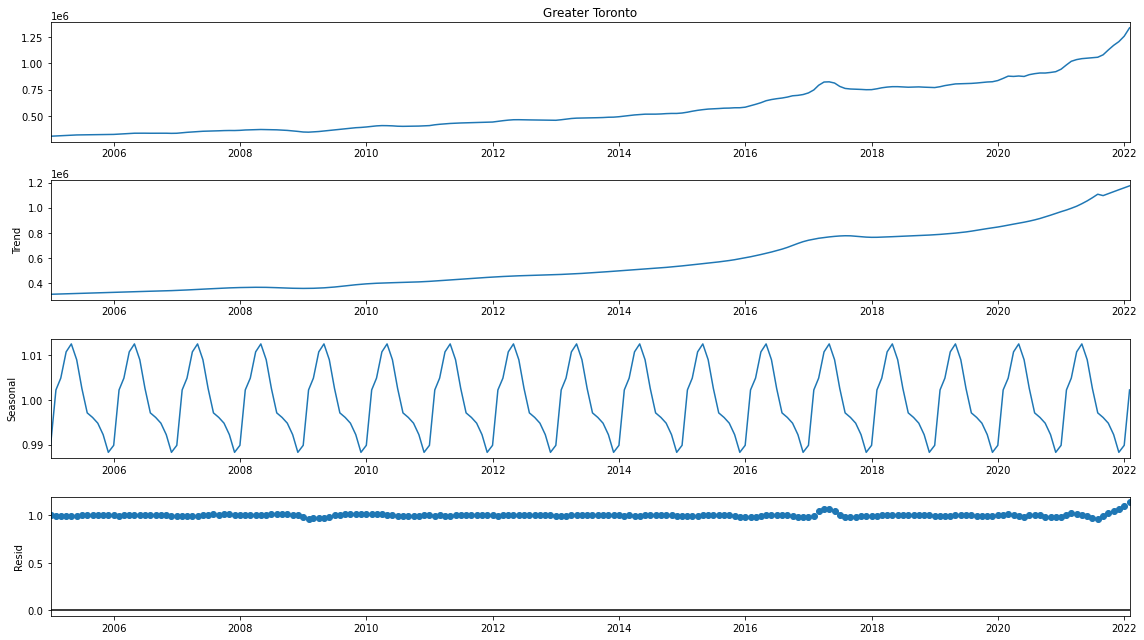

In [3]:
series = df['Greater Toronto']
result = seasonal_decompose(series, model='multiplicative',extrapolate_trend='freq')
residual = result.resid
seasonal = result.seasonal 
trend = result.trend
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

4. Monthly heatmap

Text(0.5, 1.0, 'GTA Housing Price Month over Month Change in Percentage')

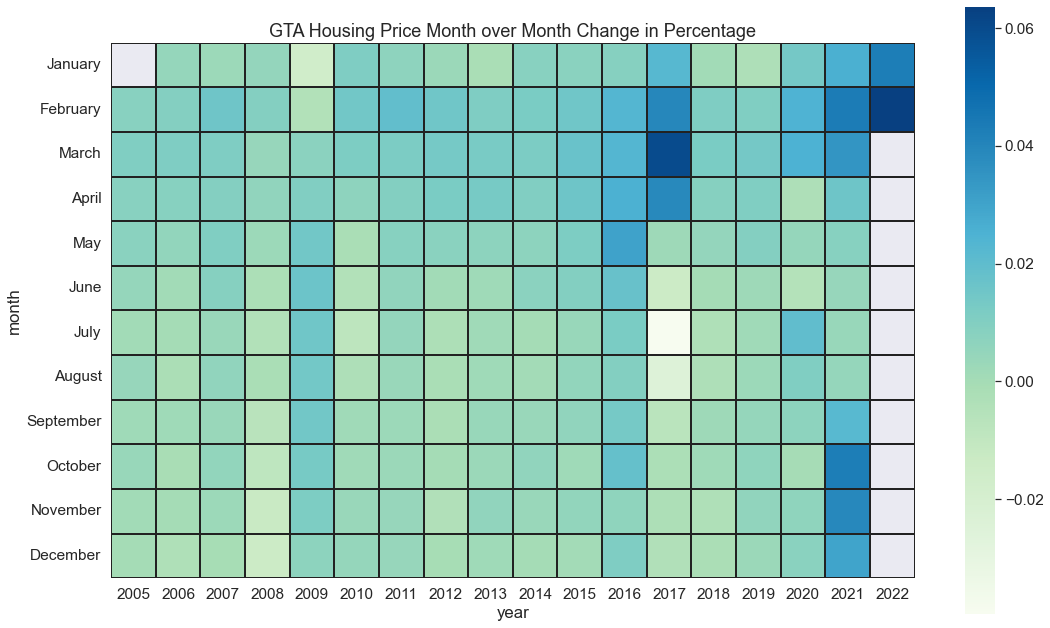

In [114]:
df_heatmap = pd.DataFrame(series.pct_change())
df_heatmap = df_heatmap.dropna()
df_heatmap['month'] = [calendar.month_name[mo] for mo in df_heatmap.index.month]
df_heatmap['year'] = df_heatmap.index.year
table = pd.pivot_table(df_heatmap, values='Greater Toronto', index=['month'], columns=['year'], aggfunc=np.sum)
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
table = table.reindex(new_order, axis=0)
sns.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(table,
                cmap='GnBu',  # Choose a squential colormap
                annot_kws={'fontsize':11},  # Reduce size of label to fit
                cbar_kws={"shrink": 0.62},
                fmt='',          # Interpret labels as strings
                square=True,     # Force square cells
                vmax=table.max().max(),         # Ensure same 
                vmin=table.min().min(),          # color scale
                linewidth=0.01,  # Add gridlines
                linecolor="#222",# Adjust gridline color
               )
ax.set_title('GTA Housing Price Month over Month Change in Percentage',fontsize=18)

5. Word Clouds

In [84]:
with open('CMHC 2017.txt', 'r') as file:
    data = file.read().replace('\n', ' ')

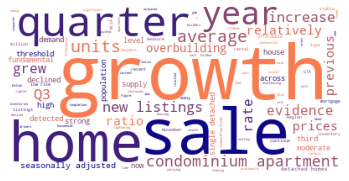

In [101]:
stopwords = set(STOPWORDS)
stopwords.update(["price", "market","per","cent","number"])
from matplotlib.colors import LinearSegmentedColormap
colors = ["darkblue", "coral"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)
wordcloud = WordCloud(stopwords=stopwords, max_words=1000,background_color='white',colormap=cmap).generate(data)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


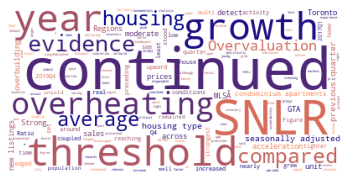

In [102]:
with open('CMHC 2020.txt', 'r') as file:
    data2 = file.read().replace('\n', ' ')
stopwords = set(STOPWORDS)
stopwords.update(["price", "market","per","cent","number","2019Q3"])
colors = ["darkblue", "coral"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)
wordcloud = WordCloud(stopwords=stopwords, max_words=1000,background_color='white',colormap=cmap).generate(data2)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [6]:
df_econ = pd.read_csv("economic factors.csv", index_col=0, parse_dates=[0])
df_econ = df_econ.dropna()
df_econ['Trend'] = trend.values
df_econ['Seasonal'] = (seasonal * residual).values
df_econ

,Greater Toronto,CPI,Ontario Population,Real GDP,Unemployment Rate,Prime Rate,Trend,Seasonal
Date,,,,,,,,
Jan-05,305500,105.3,12446466,0.013843,0.070,0.0425,3.091697e+05,0.988130
Feb-05,308000,105.7,12446466,0.013843,0.070,0.0425,3.105184e+05,0.991890
Mar-05,311300,106.3,12446466,0.013843,0.069,0.0425,3.118670e+05,0.998182
Apr-05,313800,106.6,12477967,0.029021,0.067,0.0425,3.132156e+05,1.001866
May-05,316200,106.7,12477967,0.029021,0.070,0.0425,3.145642e+05,1.005200
...,...,...,...,...,...,...,...,...
Oct-21,1128600,143.9,14915270,0.065092,0.068,0.0245,1.111445e+06,1.015434
Nov-21,1172900,144.2,14915270,0.065092,0.061,0.0245,1.126962e+06,1.040762
Dec-21,1208000,144.0,14915270,0.065092,0.060,0.0245,1.142479e+06,1.057350


6. Economic Variables

In [7]:
scaler = StandardScaler()
scaler = scaler.fit(df_econ[['Trend']])
df_econ_new = df_econ.copy()
df_econ_new['Price Trend'] = scaler.transform(df_econ[['Trend']])
scaler = scaler.fit(df_econ[['CPI']])
df_econ_new['CPI'] = scaler.transform(df_econ[['CPI']])
scaler = scaler.fit(df_econ[['Ontario Population']])
df_econ_new['Ontario Population'] = scaler.transform(df_econ[['Ontario Population']])
scaler = scaler.fit(df_econ[['Real GDP']])
df_econ_new['Real GDP'] = scaler.transform(df_econ[['Real GDP']])
scaler = scaler.fit(df_econ[['Unemployment Rate']])
df_econ_new['Unemployment Rate'] = scaler.transform(df_econ[['Unemployment Rate']])
scaler = scaler.fit(df_econ[['Prime Rate']])
df_econ_new['Prime Rate'] = scaler.transform(df_econ[['Prime Rate']])
df_econ_new

,Greater Toronto,CPI,Ontario Population,Real GDP,Unemployment Rate,Prime Rate,Trend,Seasonal,Price Trend
Date,,,,,,,,,
Jan-05,305500,-1.771493,-1.570753,-0.030529,-0.036545,0.682765,3.091697e+05,0.988130,-1.135239
Feb-05,308000,-1.732509,-1.570753,-0.030529,-0.036545,0.682765,3.105184e+05,0.991890,-1.129274
Mar-05,311300,-1.674033,-1.570753,-0.030529,-0.123075,0.682765,3.118670e+05,0.998182,-1.123310
Apr-05,313800,-1.644795,-1.526904,0.366974,-0.296137,0.682765,3.132156e+05,1.001866,-1.117345
May-05,316200,-1.635049,-1.526904,0.366974,-0.036545,0.682765,3.145642e+05,1.005200,-1.111381
...,...,...,...,...,...,...,...,...,...
Oct-21,1128600,1.990446,1.865815,1.311636,-0.209606,-0.895597,1.111445e+06,1.015434,2.412989
Nov-21,1172900,2.019683,1.865815,1.311636,-0.815321,-0.895597,1.126962e+06,1.040762,2.481616
Dec-21,1208000,2.000192,1.865815,1.311636,-0.901852,-0.895597,1.142479e+06,1.057350,2.550242


In [8]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

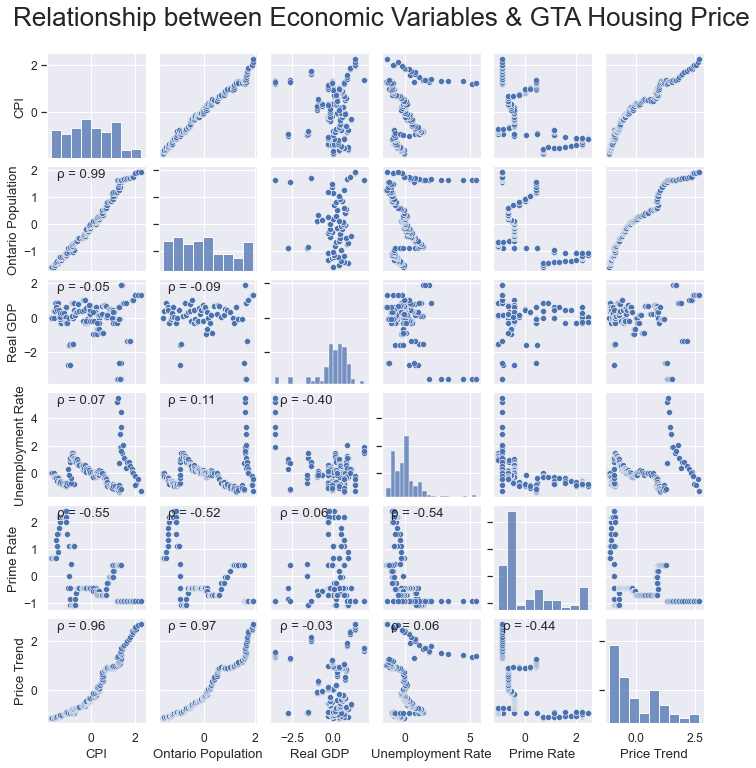

In [163]:
sns.set(font_scale = 1.1)
pp = sns.pairplot(df_econ_new[['CPI','Ontario Population','Real GDP','Unemployment Rate','Prime Rate', 'Price Trend']],height=1.7)
pp.map_lower(corrfunc)
pp.fig.text(0.04, 1.02,'Relationship between Economic Variables & GTA Housing Price', fontsize=26)
# Tight layout to realign things
fig.tight_layout()
plt.show()

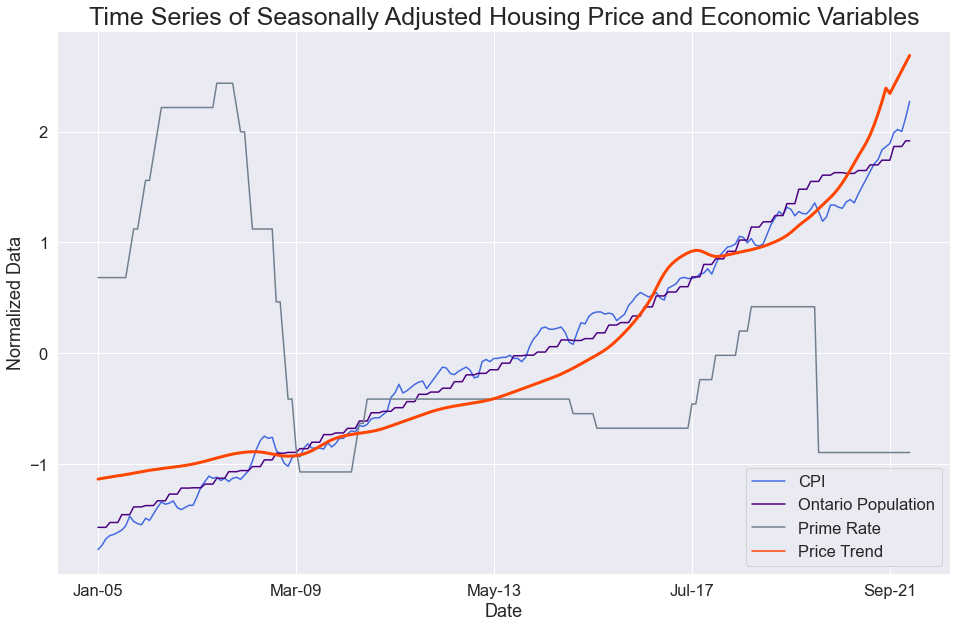

In [185]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize=(16,10))
colors={"CPI": "royalblue", "Ontario Population": "indigo", "Prime Rate": "slategrey", "Price Trend": "orangered"}
df_econ_new[['CPI','Ontario Population','Prime Rate', 'Price Trend']].plot.line(color=colors, ax=ax, grid=True)
for line in ax.get_lines():
    if line.get_label() == "Price Trend":
        line.set_linewidth(3)
plt.ylabel("Normalized Data")
plt.title('Time Series of Seasonally Adjusted Housing Price and Economic Variables', fontsize = 25)
plt.show()

## Forecasting Model
#### GRU

In [9]:
def prep_data(df, start, end, n_lookback, n_forward):
    X = []
    Y = []
    n = len(df)
    while start + n_lookback + 1 <= end:
        if start + n_lookback + n_forward <= end:
            X += [np.array(df['Seasonal'][start: start+n_lookback])]
            Y += [np.array(df['Seasonal'][start+n_lookback: start+n_lookback+n_forward])]
        start += 1
    return np.array(X),np.array(Y)

def prep_data_test(df, start, end, n_lookback, n_forward):
    X = []
    Y = []
    while start + n_lookback + n_forward <= end:
        X += [np.array(df['Seasonal'][start: start+n_lookback])]
        Y += [np.array(df['Seasonal'][start+n_lookback: start+n_lookback+n_forward])]
        start += n_forward
    return np.array(X),np.array(Y)

def prep_data_forecast(df, start, end, n_lookback, n_forward):
    X = []
    Y = []
    while start + n_lookback <= end:
        X += [np.array(df['Seasonal'][start: start+n_lookback])]
        start += n_forward
    return np.array(X)

def train_GRU(X,Y,n_steps_in,n_steps_out):
    # Initializing LTSM Model
    gru_model = Sequential()
    gru_model.add(GRU(24, activation='relu', input_shape=(n_steps_in, 1)))
    gru_model.add(Dense(n_steps_out))
    gru_model.compile(optimizer='adam', loss='mse') 
    gru_model.fit(X, Y, epochs=35, verbose=0)
    return gru_model

In [12]:
def GRU_forecast2(df, n_steps_in, n_steps_out):
    start = 0
    end = len(df)-24
    X,Y = prep_data(df, start, end, n_steps_in, n_steps_out)
    X = np.reshape(X, (X.shape[0],X.shape[1], 1 ))
    gru_model = train_GRU(X,Y,n_steps_in,n_steps_out)
    testX = prep_data_forecast(df, end+12, end+24, n_steps_in, n_steps_out)
    testX = np.reshape(testX, (testX.shape[0],testX.shape[1], 1 ))
    predict_GRU = gru_model.predict(testX).ravel()
    return predict_GRU

In [15]:
GRU_pred2 = GRU_forecast2(df_econ_new, 12, 12)

In [16]:
GRU_pred2

array([1.0750313 , 0.98756564, 1.0154867 , 1.0110437 , 1.053541  ,
       1.02867   , 1.0769742 , 1.0528725 , 0.99415374, 1.0391246 ,
       0.9975027 , 1.0283163 ], dtype=float32)

#### Ridge Regression

In [17]:
X = df_econ[['CPI','Ontario Population','Prime Rate']].values
Y = df_econ['Trend'].values
model = Ridge()
parameters={'alpha':[0.1,0.5,1,3,5,10]}
Ridge_regression= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)
Ridge_regression.fit(X,Y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.5, 1, 3, 5, 10]},
             scoring='neg_mean_squared_error')

In [18]:
print(Ridge_regression.best_estimator_)

Ridge(alpha=10)


In [19]:
model = Ridge(alpha=10)
model.fit(X,Y)

Ridge(alpha=10)

In [20]:
model.score(X, Y)

0.9403091870269042

In [41]:
fc_econ = pd.read_csv("Forecasted econ.csv", index_col=0, parse_dates=[0])
fc_econ

,CPI,Ontario Population,Prime Rate
Date,,,
Mar-22,147.472833,14951825,0.0270
Apr-22,148.161040,14970820,0.0295
May-22,148.852458,14970820,0.0295
Jun-22,149.547103,14970820,0.0295
Jul-22,150.082980,15007794,0.0320
Aug-22,150.620777,15007794,0.0320
Sep-22,151.160502,15007794,0.0320
Oct-22,151.576193,15038622,0.0345
Nov-22,151.993028,15038622,0.0345


In [42]:
fc_X = fc_econ.values

In [43]:
ridge_pred = model.predict(fc_X)
ridge_pred

array([ 980315.82508502,  985583.20751477,  984695.72960938,
        983804.11016388,  995081.21396687,  994390.91796175,
        993698.14827656, 1003141.97375036, 1002606.94095985,
       1002070.43682259, 1030895.39243327, 1030519.71831763])

In [44]:
final_pred = ridge_pred * GRU_pred2

In [45]:
final_pred.mean()

1028790.1621791947

In [46]:
fc_econ['Greater Toronto'] = final_pred
fc_econ['Trend'] = ridge_pred
df_econ2 = df_econ[['CPI','Ontario Population','Prime Rate','Greater Toronto','Trend']]

In [47]:
proj_final = pd.concat([df_econ2, fc_econ], axis=0)
proj_final = proj_final.rename(columns={'Greater Toronto': 'Unadjusted Housing Price','Trend':'Seasonally Adjusted Price'})
proj_final = proj_final.iloc[120: , :]
proj_final

,CPI,Ontario Population,Prime Rate,Unadjusted Housing Price,Seasonally Adjusted Price
Date,,,,,
Jan-15,124.300000,13657737,0.0285,5.270000e+05,5.354458e+05
Feb-15,125.400000,13657737,0.0285,5.349000e+05,5.397875e+05
Mar-15,126.300000,13657737,0.0285,5.441000e+05,5.443083e+05
Apr-15,126.200000,13669860,0.0285,5.527000e+05,5.488042e+05
May-15,126.900000,13669860,0.0285,5.591000e+05,5.532625e+05
...,...,...,...,...,...
Oct-22,151.576193,15038622,0.0345,1.056181e+06,1.003142e+06
Nov-22,151.993028,15038622,0.0345,9.967454e+05,1.002607e+06
Dec-22,152.411009,15038622,0.0345,1.041276e+06,1.002070e+06


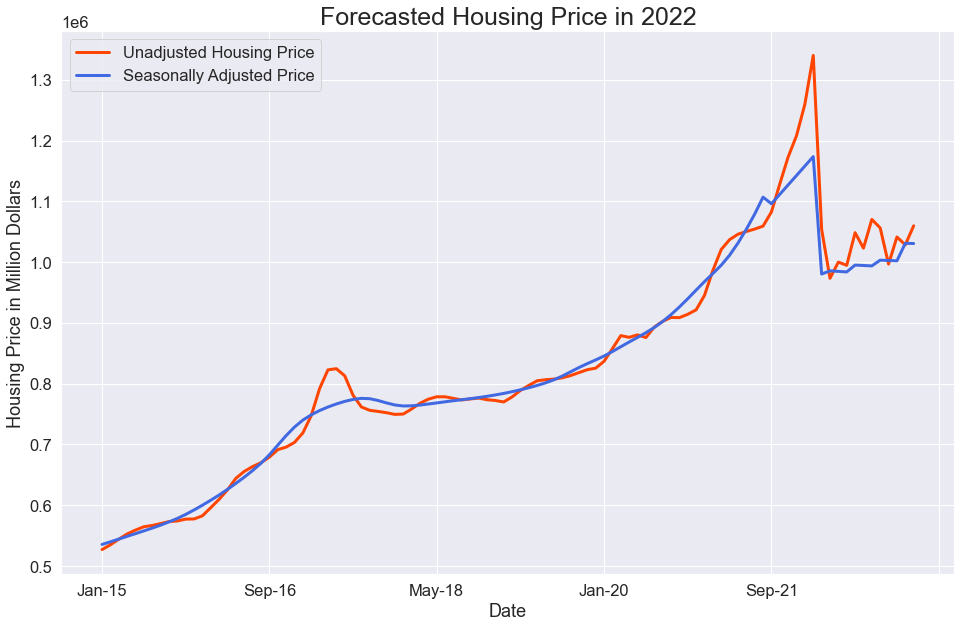

In [48]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize=(16,10))
colors={'Seasonally Adjusted Price': "royalblue", 'Unadjusted Housing Price': "orangered"}
proj_final[['Unadjusted Housing Price','Seasonally Adjusted Price']].plot.line(color=colors, ax=ax, grid=True,linewidth=3)
plt.ylabel("Housing Price in Million Dollars")
plt.title('Forecasted Housing Price in 2022', fontsize = 25)
plt.show()